<a href="https://www.kaggle.com/code/martaseidler/sleep-health-and-lifestyle?scriptVersionId=161281258" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid",{"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("Set2")

In [2]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle/ss.csv')

## A quick look at the Data

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df = df.drop('Person ID', axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

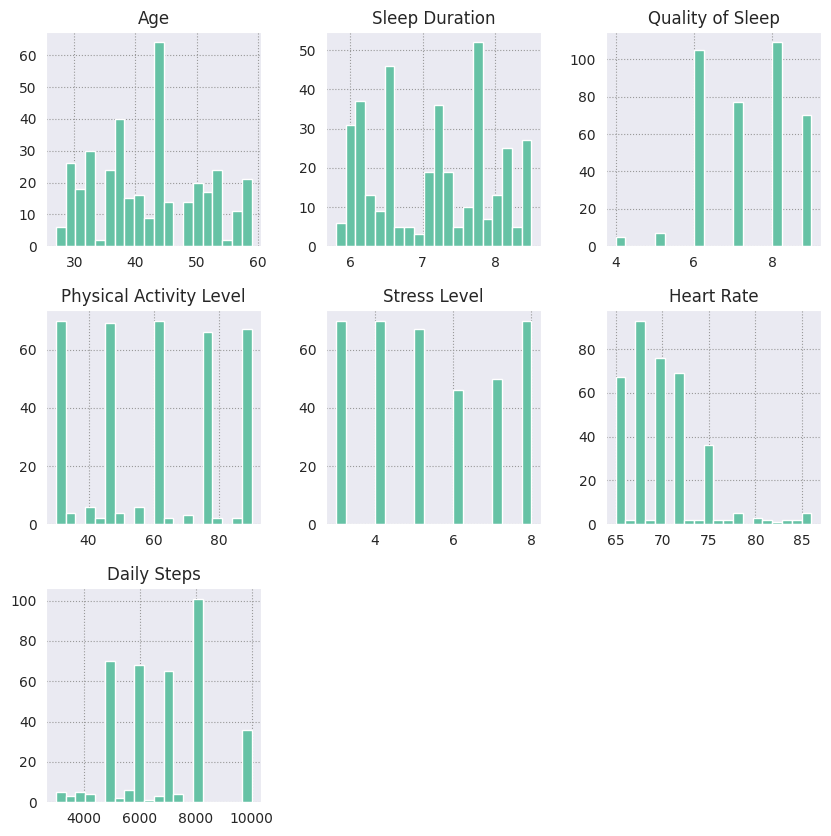

In [5]:
df.hist(figsize=(10, 10), bins=20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   373 non-null    object 
 1   Age                      373 non-null    int64  
 2   Occupation               373 non-null    object 
 3   Sleep Duration           373 non-null    float64
 4   Quality of Sleep         373 non-null    int64  
 5   Physical Activity Level  373 non-null    int64  
 6   Stress Level             373 non-null    int64  
 7   BMI Category             373 non-null    object 
 8   Blood Pressure           373 non-null    object 
 9   Heart Rate               373 non-null    int64  
 10  Daily Steps              373 non-null    int64  
 11  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.1+ KB


In [7]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,373,373,373,373,154
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,72,195,99,77


In [9]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    77
Insomnia       77
Name: count, dtype: int64

In [10]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [11]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     77
Insomnia        77
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   373 non-null    object 
 1   Age                      373 non-null    int64  
 2   Occupation               373 non-null    object 
 3   Sleep Duration           373 non-null    float64
 4   Quality of Sleep         373 non-null    int64  
 5   Physical Activity Level  373 non-null    int64  
 6   Stress Level             373 non-null    int64  
 7   BMI Category             373 non-null    object 
 8   Blood Pressure           373 non-null    object 
 9   Heart Rate               373 non-null    int64  
 10  Daily Steps              373 non-null    int64  
 11  Sleep Disorder           373 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.1+ KB


In [13]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       147
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [14]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [15]:
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    147
Obese          10
Name: count, dtype: int64

In [16]:
occupation = df['Occupation'].value_counts()
occupation

Occupation
Nurse                   72
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Distribution of Respondents')

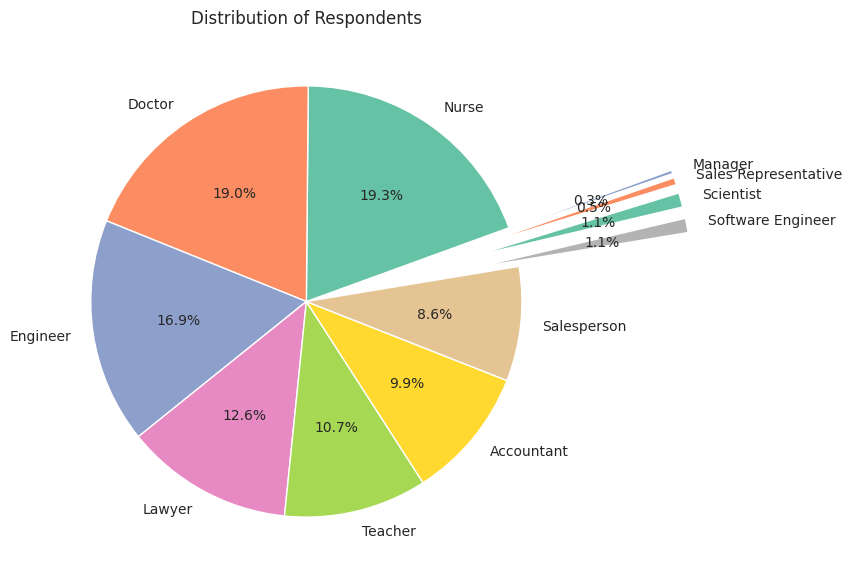

In [17]:
plt.figure(figsize=(7, 7))
plt.pie(occupation, 
        labels=occupation.index, 
        autopct='%1.1f%%', 
        startangle=20, 
        explode=[0, 0, 0, 0, 0, 0, 0, 0.8, 0.8, 0.8, 0.8])
plt.title("Distribution of Respondents")

In [18]:
df['Gender'].value_counts()

Gender
Male      189
Female    184
Name: count, dtype: int64

In [19]:
group_sleep_disorder_by_gender = df.groupby('Gender')['Sleep Disorder'].value_counts().sort_index()
group_sleep_disorder_by_gender

Gender  Sleep Disorder
Female  Insomnia           36
        No Disorder        82
        Sleep Apnea        66
Male    Insomnia           41
        No Disorder       137
        Sleep Apnea        11
Name: count, dtype: int64

<Axes: title={'center': 'Dependence between quality of sleep and daily steps'}, xlabel='Daily Steps', ylabel='Quality of Sleep'>

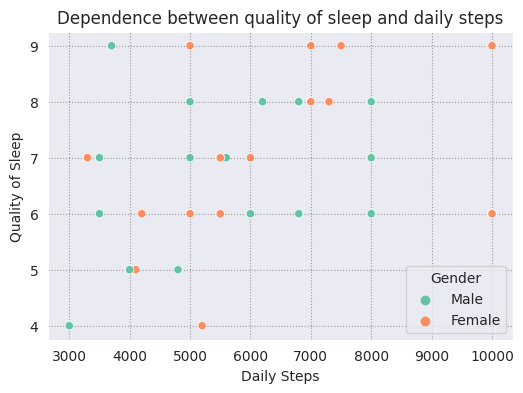

In [20]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between quality of sleep and daily steps")
sns.scatterplot(data=df, x='Daily Steps', y='Quality of Sleep', hue='Gender')

<Axes: title={'center': 'Dependence between quality of sleep and age'}, xlabel='Age', ylabel='Quality of Sleep'>

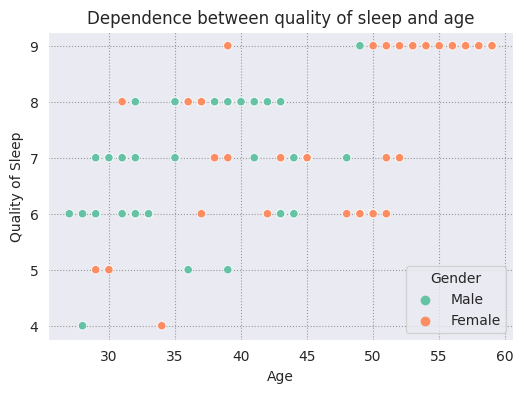

In [21]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between quality of sleep and age")
sns.scatterplot(data=df, x='Age', y='Quality of Sleep', hue='Gender')

In [22]:
df[["High Pressure","Low Pressure"]]=df["Blood Pressure"].str.split("/",expand=True)

In [23]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [24]:
df['High Pressure'] = df['High Pressure'].astype('int32')
df['Low Pressure'] = df['Low Pressure'].astype('int32')

In [25]:
def high_pressure(high_pressure):
    if high_pressure > 139:
        return 'Hypertension'
    elif high_pressure > 90:
        return 'Normal'
    else: 
        return 'Hypotension'

In [26]:
df['Blood Pressure Level'] = df['High Pressure'].apply(high_pressure)

In [27]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High Pressure,Low Pressure,Blood Pressure Level
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension


<Axes: title={'center': 'Dependence between BMI and Blood High Pressure'}, xlabel='BMI Category', ylabel='High Pressure'>

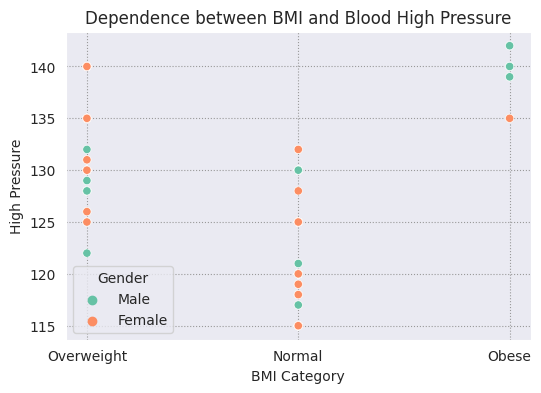

In [28]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between BMI and Blood High Pressure")
sns.scatterplot(data=df, x='BMI Category', y='High Pressure', hue='Gender')

Text(0.5, 1.0, 'Distribution of Blood Pressure Level')

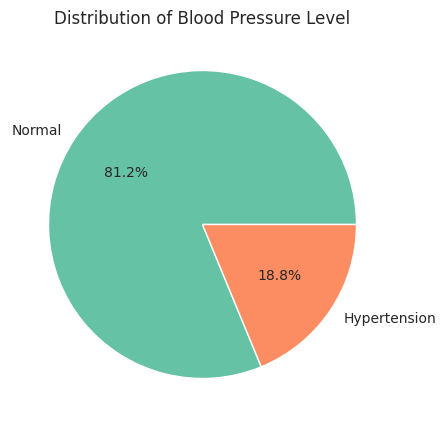

In [29]:
plt.figure(figsize=(5, 5))
plt.pie(df['Blood Pressure Level'].value_counts(), 
        labels=df['Blood Pressure Level'].unique(), 
        autopct='%1.1f%%')
plt.title("Distribution of Blood Pressure Level")

<Axes: title={'center': 'Dependence between Blood High Pressure and Quality of Sleep'}, xlabel='High Pressure', ylabel='Quality of Sleep'>

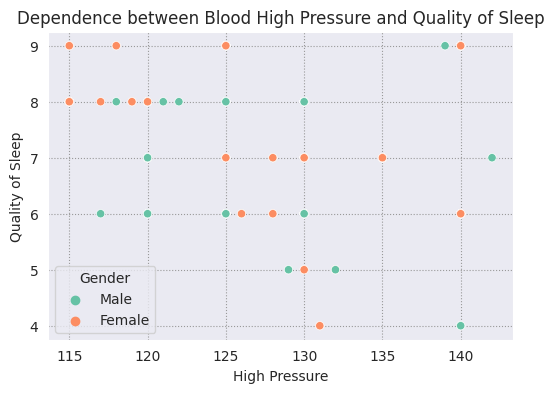

In [30]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Blood High Pressure and Quality of Sleep")
sns.scatterplot(data=df, x='High Pressure', y='Quality of Sleep', hue='Gender')

<Axes: title={'center': 'Dependence between Blood High Pressure and Age'}, xlabel='Age', ylabel='High Pressure'>

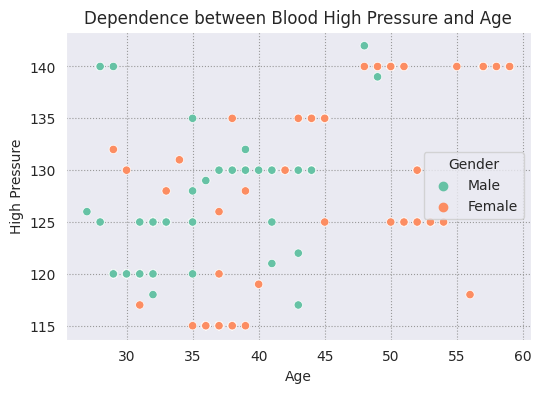

In [31]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Blood High Pressure and Age")
sns.scatterplot(data=df, x='Age', y='High Pressure', hue='Gender')

<Axes: title={'center': 'Dependence between Stress Level and Blood High Pressure'}, xlabel='Stress Level', ylabel='High Pressure'>

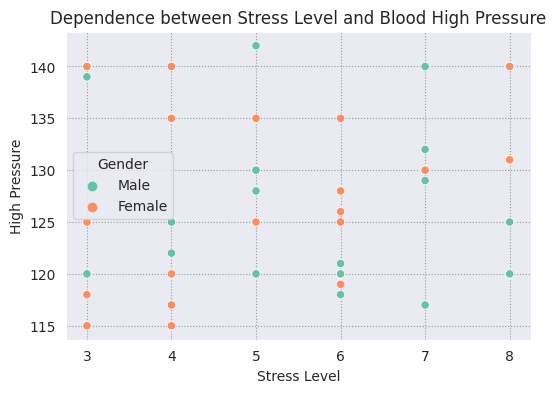

In [32]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Stress Level and Blood High Pressure")
sns.scatterplot(data=df, x='Stress Level', y='High Pressure', hue='Gender')

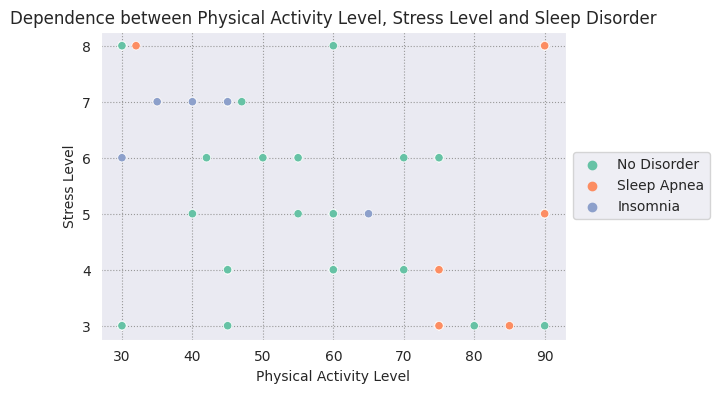

In [33]:
plt.figure(figsize=(6, 4))
plt.title("Dependence between Physical Activity Level, Stress Level and Sleep Disorder")
sns.scatterplot(data=df, x='Physical Activity Level', y='Stress Level', hue='Sleep Disorder')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [34]:
occupation_sleep_group = df.groupby('Occupation')['Sleep Duration'].mean()
occupation_sleep_group

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.048611
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

Text(0.5, 1.0, 'Average Sleep Duration in Occupations')

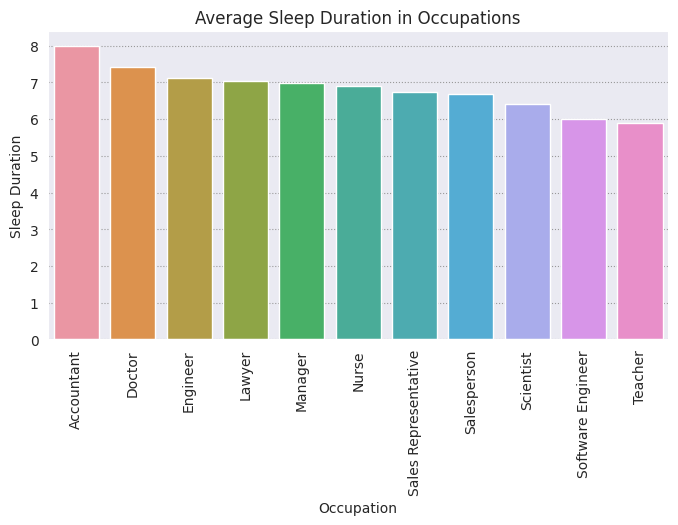

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(x=occupation_sleep_group.index, y=occupation_sleep_group.sort_values(ascending=False))
plt.xticks(rotation ='vertical')
plt.title("Average Sleep Duration in Occupations")

### *to be continued...*